# Primer taller análisis numerico: Ejercicios de aplicación

> Sebastian Tamayo

> Emanuel Cabrera

> **advertencia**: En este trabajo no se requirió utilizar el método de posición falsa, por ende el numeral nueve (9) no aplica.

In [1]:
# Librerias necesarias
import math
import pymethods as pm # libreria propia 
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Punto 1.a

In [2]:
# Definició de constantes
tol = 5e-6 # tolerancia de 0.000005ºC
# valores iniciales
a = 0 #0ºC
b = 40 #40ºC

Para determinar la cantidad de iteraciones que requiere el método de bisección se utiliza la siguiente formula:

Sea $N$ la cantidad de iteraciones que utiliza el método de bisección, $\varepsilon$ el error. Entonces para encontrar la cantidad de iteraciones que necesita el método de bisección en el rango $[a, b]$
$$
N = \left\lceil \frac{\log\left(\frac{b - a}{\varepsilon}\right)}{\log(2)}\right\rceil = \left\lceil\log_2\left(\frac{b - a}{\varepsilon}\right)\right\rceil
$$

In [3]:
# recordar: pm es el alias para pymethods (libreria personal)
pm.bisection_iters(a, b, tol)

23

como la cantidad de iteraciones depende únicamente del rango $[a, b]$, para los tres casos la cantidad de iteraciones necesarias es la misma: 22

#### Punto 1.b

Despejando $O_{sf}$ queda:
$$
O_{sf} = e^{- 139.34411 + \frac{1.575701 \times 10^{5}}{T_{a}}  - \frac{6.642308 \times 10^7}{T^{2}_{a}} + \frac{1.243800 \times 10^10}{T^{3}_a}}
$$
Ahora se reemplaza $T_a = T + 273.15$
$$
O_{sf} = e^{- 139.34411 + \frac{1.575701 \times 10^{5}}{T + 273.15}  - \frac{6.642308 \times 10^7}{(T + 273.15)^{2}} + \frac{1.243800 \times 10^10}{(T + 273.15)^{3}}}
$$

In [4]:
def f_osf(T: float) -> float:
    return math.exp(
        -139.34411
        + (1.575701e5) / (T + 273.15)
        - (6.642308e7) / ((T + 273.15)**2)
        + (1.243800e10) / ((T + 273.15)**3)
        - (8.621949e11) / ((T + 273.15)**4)
          )

In [5]:
interval = np.linspace(a, b, 1000)  # intevalo con 1000 puntos

In [6]:
# Ahora se va a evaluar la función de 0ºC a 40ºC
f_T_values = []
for i in interval:
    f_T_values.append(f_osf(i))

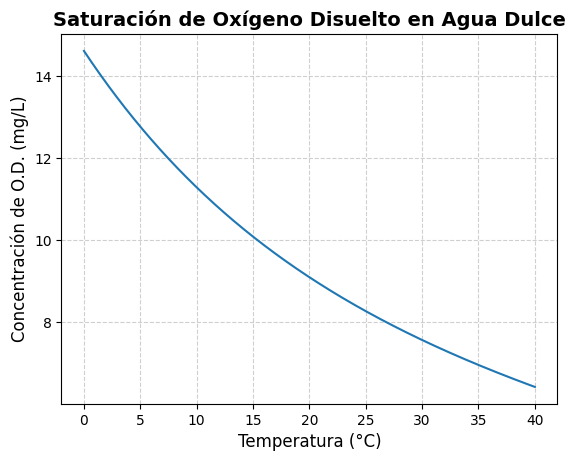

In [7]:
plt.plot(interval, f_T_values)

# Configura los ejes
plt.xlabel('Temperatura (°C)', fontsize=12)
plt.ylabel('Concentración de O.D. (mg/L)', fontsize=12)

plt.title('Saturación de Oxígeno Disuelto en Agua Dulce', fontsize=14, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Punto 2
$$
c = c_{\text{ent}}(1 - e^{-0.04t}) +c_0 e^{-0.04t}
$$

$$
c_0 = 5
$$
$$
c_{\text{ent}} = 12
$$

## Punto 2.a
Calcule el tiempo requerido para que $c$ sea el $85%$ de $c_{\text{ent}}$ con un método abierto.

In [33]:
# Primero definimos la función c(t)
# (utilizando las constantes antes definidas)
def c_t(t, c_0: float = 5.0, c_ent: float = 12.0):
    return c_ent*(1 - math.exp(-0.04 * t)) + (c_0 * math.exp(-0.04 * t))

Definimos las constanes y econtramos el $85%$ de $C_{\text{ent}}$

In [35]:
c_ent = 12
c_0 = 5
c = c_ent * (85/100)

# finimos una tolerancia adecuada para obtener
# un mejor resultado aproximado
tol = 1e-8

Definimos la función sobre la cual vamos hacer el método abierto, en este caso el método de newton

In [36]:
t = sp.Symbol('t')
f = c_ent*(1 - sp.exp(-0.04 * t)) + (c_0 * sp.exp(-0.04 * t)) - c

In [38]:
# aplicamos el método de newton
# definimos un punto de partida arbitrario
x_0 = 0
result = pm.newton_method(f, t, x_0, tol)

In [39]:
result

33.9530871038298

In [41]:
# verificamos la solución
assert pm.absolute_error(c_t(result), c) <= tol
# todo correcto

## Punto 2.a

Para este caso se ha escogido el método de bisección.

definimos la función sobre la cual se va a plicar el método numérico

In [42]:
f = lambda t : c_t(t) - c

Primero debemos escojer un rango $[a, b]$ donde $f(a) \times f(b) < 0$

In [43]:
f(10)

-2.8922403222494744

In [44]:
f(70)

1.374329561623476

In [46]:
a = 10
b = 70

In [47]:
result = pm.bisection(f, a, b, tol)

In [48]:
result

33.95308718085289

In [49]:
assert pm.absolute_error(c_t(result), c) <= tol

## Punto 4
$$
K = \frac{c_{c, 0} + x}{(c_{a, 0 - 2x})^{2}(c_{b, 0} - x)}
$$

In [18]:
K = 0.016
c_a0 = 42
c_b0 = 28
c_c0 = 4

In [19]:
def K_x(x: float, ca0: float = c_a0, cb0: float = c_b0, cc0: float = c_c0) -> float:
    return (cc0 + x) / (((ca0 - 2*x)**2) * (cb0 - x))

método cerrado

In [20]:
tol = 1e-5

In [21]:
a = -3
b = 27

In [22]:
K_x(a) - K

-0.015985999103942654

In [23]:
K_x(b) - K

0.19927777777777778

In [24]:
result = pm.bisection(lambda x : K_x(x) - K, a, b, tol)

In [25]:
result

15.922119140625

In [26]:
assert abs(K_x(result) - K) <= tol

In [27]:
interval = np.linspace(a, b, 1000)

In [28]:
points = []
for i in interval:
    points.append(K_x(i) - K)

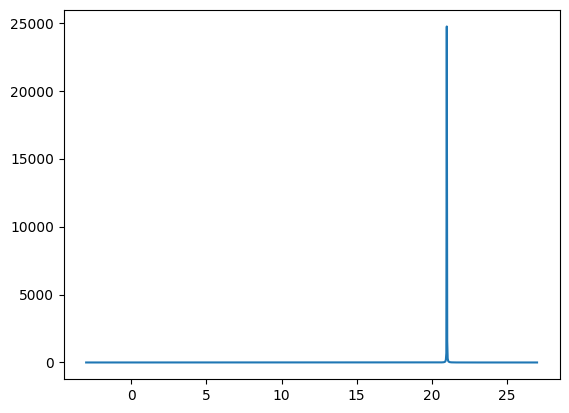

In [29]:
plt.plot(interval, points)

In [30]:
x = sp.Symbol('x')
f_x = ((c_c0 + x) / (((c_0 - 2*x)**2) * (c_b0 - x))) - K

In [31]:
result = pm.newton_method(f_x, x, 20, tol=tol, max_iter=1000)

ValueError: No se encontró la raíz en 1000 iteraciones

In [ ]:
result

In [ ]:
assert abs(K_x(result[0]) - K) <= tol